<a href="https://colab.research.google.com/github/syejin2004/2024-1-my-BDA/blob/main/inclass/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0__%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import site
!pip install missingno
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno


In [96]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import pandas as pd

# 데이터 파일 불러오기
data = pd.read_csv("crime_data.csv", encoding='utf-8')  # 한글 인코딩에 맞춰서 불러오기

# 데이터 출력하여 확인하기
print(data.head())


  범죄대분류  범죄중분류      서울   부산     대구     인천     광주     대전     울산    세종  ...  \
0  강력범죄   살인기수    45.0   26    9.0   23.0   10.0    4.0    9.0   2.0  ...   
1  강력범죄  살인미수등    97.0   27   21.0   21.0    8.0   11.0    2.0   3.0  ...   
2  강력범죄     강도   139.0   86   44.0   37.0   27.0   51.0   26.0   5.0  ...   
3  강력범죄     강간  1159.0  323  246.0  362.0  197.0  175.0  108.0  25.0  ...   
4  강력범죄   유사강간   180.0   46   29.0   44.0   24.0   20.0   11.0   4.0  ...   

   경남 밀양  경남 사천  경남 양산  경남 진주  경남 창원  경남 통영  제주 서귀포  제주 제주  기타도시   도시이외  
0    0.0    1.0    2.0    4.0    4.0    0.0     3.0    5.0   0.0   32.0  
1    4.0    1.0    3.0    2.0   18.0    3.0     2.0    6.0   2.0   36.0  
2    2.0    3.0    4.0    5.0   19.0    3.0     1.0    9.0   4.0   35.0  
3   12.0    7.0   29.0   31.0   66.0    8.0    25.0   78.0  10.0  353.0  
4    1.0    0.0    2.0    5.0   19.0    0.0     4.0   14.0   1.0   54.0  

[5 rows x 89 columns]


In [6]:
# 필요한 라이브러리 import
import folium
import requests
import pandas as pd
from geopy.geocoders import Nominatim

# geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="crime_visualization")

# Google Maps Geocoding API를 사용하지 않고, geopy를 사용하여 주소로부터 위도와 경도를 가져오는 함수 정의
def get_lat_lng(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# 데이터 로드
crime_data = pd.read_csv("crime_data.csv", encoding='utf-8')

# 시각화할 지도 생성
m = folium.Map(location=[37.5, 127], zoom_start=7)

# 마커 클러스터 생성
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# 각 지역에서 가장 많이 발생한 범죄 찾기 및 마커 생성
for region in crime_data.columns[2:]:
    if crime_data[region].dtype in ['int64', 'float64']:  # 데이터 유형이 숫자인 경우에만 최댓값을 찾음
        max_crime_idx = crime_data[region].idxmax()  # 해당 지역에서 가장 많이 발생한 범죄 인덱스 가져오기
        max_crime_category = crime_data.loc[max_crime_idx, '범죄중분류']  # 가장 많이 발생한 범죄 중분류 가져오기
        max_crime_count = crime_data.loc[max_crime_idx, region]  # 해당 지역에서 가장 많이 발생한 범죄 건수 가져오기
        address = region  # 각 지역의 이름을 주소로 사용
        lat, lng = get_lat_lng(address)  # 주소로부터 위도와 경도 가져오기
        if lat is not None and lng is not None:
            # 범죄 발생 건수에 따라 마커의 크기와 색상을 조절하여 동그라미로 표시
            folium.CircleMarker(
                [lat, lng],
                radius=10,
                color='blue',
                fill=True,
                fill_color='blue',
                popup=f"{region}: {max_crime_category} ({max_crime_count}건)"
            ).add_to(marker_cluster)

m


In [7]:
# 필요한 라이브러리 import
import pandas as pd

# 데이터 로드
crime_data = pd.read_csv("crime_data.csv", encoding='utf-8')

# 각 지역에서 가장 많이 발생한 범죄 찾기
for region in crime_data.columns[2:]:
    if crime_data[region].dtype in ['int64', 'float64']:  # 데이터 유형이 숫자인 경우에만 최댓값을 찾음
        max_crime_idx = crime_data[region].idxmax()  # 해당 지역에서 가장 많이 발생한 범죄 인덱스 가져오기
        max_crime_category = crime_data.loc[max_crime_idx, '범죄중분류']  # 가장 많이 발생한 범죄 중분류 가져오기
        max_crime_count = crime_data.loc[max_crime_idx, region]  # 해당 지역에서 가장 많이 발생한 범죄 건수 가져오기
        print(f"{region}에서 가장 많이 발생한 범죄 중분류는 '{max_crime_category}', 건수는 {max_crime_count}입니다.")


서울에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 61132.0입니다.
대구에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 22200.0입니다.
인천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 18173.0입니다.
광주에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 13779.0입니다.
대전에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 11967.0입니다.
울산에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 9956.0입니다.
세종에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 1398.0입니다.
경기 고양에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 7349.0입니다.
경기 과천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 607.0입니다.
경기 광명에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 2169.0입니다.
경기 광주에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 3071.0입니다.
경기 구리에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 1578.0입니다.
경기 군포에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 1267.0입니다.
경기 김포에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 3289.0입니다.
경기 남양주에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 4339.0입니다.
경기 동두천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 764.0입니다.
경기 부천에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 6974.0입니다.
경기 성남에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 7592.0입니다.
경기 수원에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 11159.0입니다.
경기 시흥에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건수는 6327.0입니다.
경기 안산에서 가장 많이 발생한 범죄 중분류는 '교통범죄', 건

In [12]:
drive = pd.read_csv('무면허.csv', encoding='euc-kr')
drive.head()

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,중구,1,0,1,0,1,0
1,서울,용산구,3,2,4,2,2,0
2,서울,성동구,1,0,1,0,1,0
3,서울,마포구,1,0,1,0,1,0
4,서울,영등포구,1,0,1,0,1,0


In [31]:
# '시도'별로 그룹화하여 발생건수 집계
drive_counts = drive.groupby('시도')['발생건수'].sum().reset_index()

# 결과 출력
drive_counts


,시도,발생건수
0,강원,5
1,경기,43
2,경남,5
3,경북,3
4,대구,8
5,대전,4
6,부산,1
7,서울,16
8,인천,3
9,전북,3


In [14]:
har = pd.read_csv('뺑소니.csv', encoding='euc-kr')
har.head()

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,17,0,28,6,20,2
1,서울,중구,13,0,17,4,11,2
2,서울,용산구,41,1,57,15,42,0
3,서울,성동구,24,0,44,4,40,0
4,서울,동대문구,33,0,45,12,33,0


In [30]:
# '시도'별로 그룹화하여 발생건수 집계
har_counts = har.groupby('시도')['발생건수'].sum().reset_index()

# 결과 출력
har_counts


,시도,발생건수
0,강원,226
1,경기,1988
2,경남,332
3,경북,386
4,광주,375
5,대구,727
6,대전,198
7,부산,457
8,서울,789
9,세종,19


In [16]:
drink = pd.read_csv('음주운전.csv', encoding='euc-kr')
drink.head()

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,63,0,110,18,83,9
1,서울,중구,70,1,104,25,65,14
2,서울,용산구,100,0,183,46,129,8
3,서울,성동구,85,1,156,32,119,5
4,서울,동대문구,97,1,162,39,116,7


In [29]:
# '시도'별로 그룹화하여 발생건수 집계
drink_counts = drink.groupby('시도')['발생건수'].sum().reset_index()

# 결과 출력
drink_counts


,시도,발생건수
0,강원,679
1,경기,5090
2,경남,958
3,경북,1190
4,광주,675
5,대구,890
6,대전,594
7,부산,743
8,서울,2856
9,세종,98


In [39]:
merge_df = pd.merge(pd.merge(drive_counts, har_counts, on='시도', how='outer'), drink_counts, on='시도', how='outer')

merge_df.rename(columns={'발생건수_x': '무면허운전', '발생건수_y': '뺑소니', '발생건수': '음주운전'}, inplace=True)

merge_df

,시도,무면허운전,뺑소니,음주운전
0,강원,5.0,226,679
1,경기,43.0,1988,5090
2,경남,5.0,332,958
3,경북,3.0,386,1190
4,대구,8.0,727,890
5,대전,4.0,198,594
6,부산,1.0,457,743
7,서울,16.0,789,2856
8,인천,3.0,579,938
9,전북,3.0,256,683


In [44]:
merge_df['최대발생건수_유형'] = merge_df[['무면허운전', '뺑소니', '음주운전']].idxmax(axis=1)
merge_df['최대발생건수'] = merge_df[['무면허운전', '뺑소니', '음주운전']].max(axis=1)

merge_df[['시도', '최대발생건수_유형', '최대발생건수']]

,시도,최대발생건수_유형,최대발생건수
0,강원,음주운전,679.0
1,경기,음주운전,5090.0
2,경남,음주운전,958.0
3,경북,음주운전,1190.0
4,대구,음주운전,890.0
5,대전,음주운전,594.0
6,부산,음주운전,743.0
7,서울,음주운전,2856.0
8,인천,음주운전,938.0
9,전북,음주운전,683.0


In [50]:
# geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="crime_visualization")

# Google Maps Geocoding API를 사용하지 않고, geopy를 사용하여 주소로부터 위도와 경도를 가져오는 함수 정의
def get_lat_lng(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# 주소를 기반으로 위도와 경도를 가져와 merge_df에 추가합니다.
merge_df['위도'], merge_df['경도'] = zip(*merge_df['시도'].apply(lambda x: get_lat_lng(x)))

# 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 색상 지정
colors = {'음주운전': 'red', '뺑소니': 'blue', '무면허운전': 'green'}

# 마커 추가
for _, row in merge_df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['시도']}<br>{row['최대발생건수_유형']}: {row['최대발생건수']}",
        icon=folium.Icon(color=colors[row['최대발생건수_유형']])
    ).add_to(m)

# 지도 표시
m


In [51]:
# geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="crime_visualization")

# Google Maps Geocoding API를 사용하지 않고, geopy를 사용하여 주소로부터 위도와 경도를 가져오는 함수 정의
def get_lat_lng(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# 주소를 기반으로 위도와 경도를 가져와 merge_df에 추가합니다.
merge_df['위도'], merge_df['경도'] = zip(*merge_df['시도'].apply(lambda x: get_lat_lng(x)))

# 범죄 발생 건수에 따라 동그라미의 크기와 색상을 지정하는 함수 정의
def get_marker_properties(count):
    # 크기 지정 (범죄 발생 건수가 많을수록 크기 증가)
    radius = 10 + count / 100

    # 색상 지정
    if count < 500:
        color = 'green'  # 범죄 발생 건수가 적은 경우 녹색
    elif count < 1000:
        color = 'orange'  # 범죄 발생 건수가 중간인 경우 주황색
    else:
        color = 'red'  # 범죄 발생 건수가 많은 경우 빨간색

    return radius, color

# 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 마커 추가
for _, row in merge_df.iterrows():
    # 범죄 발생 건수에 따른 동그라미의 크기와 색상 지정
    radius, color = get_marker_properties(row['최대발생건수'])

    # 동그라미 마커 추가
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['시도']}<br>{row['최대발생건수_유형']}: {row['최대발생건수']}건"
    ).add_to(m)

# 지도 표시
m


In [58]:
g_drink = pd.read_csv('경기도_음주운전.csv', encoding='euc-kr')

g_drink.set_index('구분', inplace=True)  #인덱스 설정

g_drink

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
구분,,,,,,,,,,,,
2023,658,625,719,699,609,695,717,769,713,720,650,633
2022,589,547,694,822,767,833,859,788,761,780,751,745
2021,532,583,665,664,690,653,609,607,705,733,757,687
2020,735,475,565,597,651,684,759,645,656,585,645,493
2019,612,592,621,745,734,781,670,766,712,692,825,828
2018,828,697,1102,1007,987,1047,957,951,756,825,837,740
2017,845,839,1058,1246,1294,1288,1340,1260,1193,1127,1150,1007
2016,1258,1442,1657,1690,1518,1341,1256,1160,1011,975,952,1055


In [82]:
# 각 구분별로 월별 발생건수를 더함
total = g_drink.sum(axis=1).reset_index()

# 결과 출력
total

,구분,0
0,2023,8207
1,2022,8936
2,2021,7885
3,2020,7490
4,2019,8578
5,2018,10734
6,2017,13647
7,2016,15315


In [102]:
import matplotlib.pyplot as plt
!pip install koreanize_matplotlib
import koreanize_matplotlib

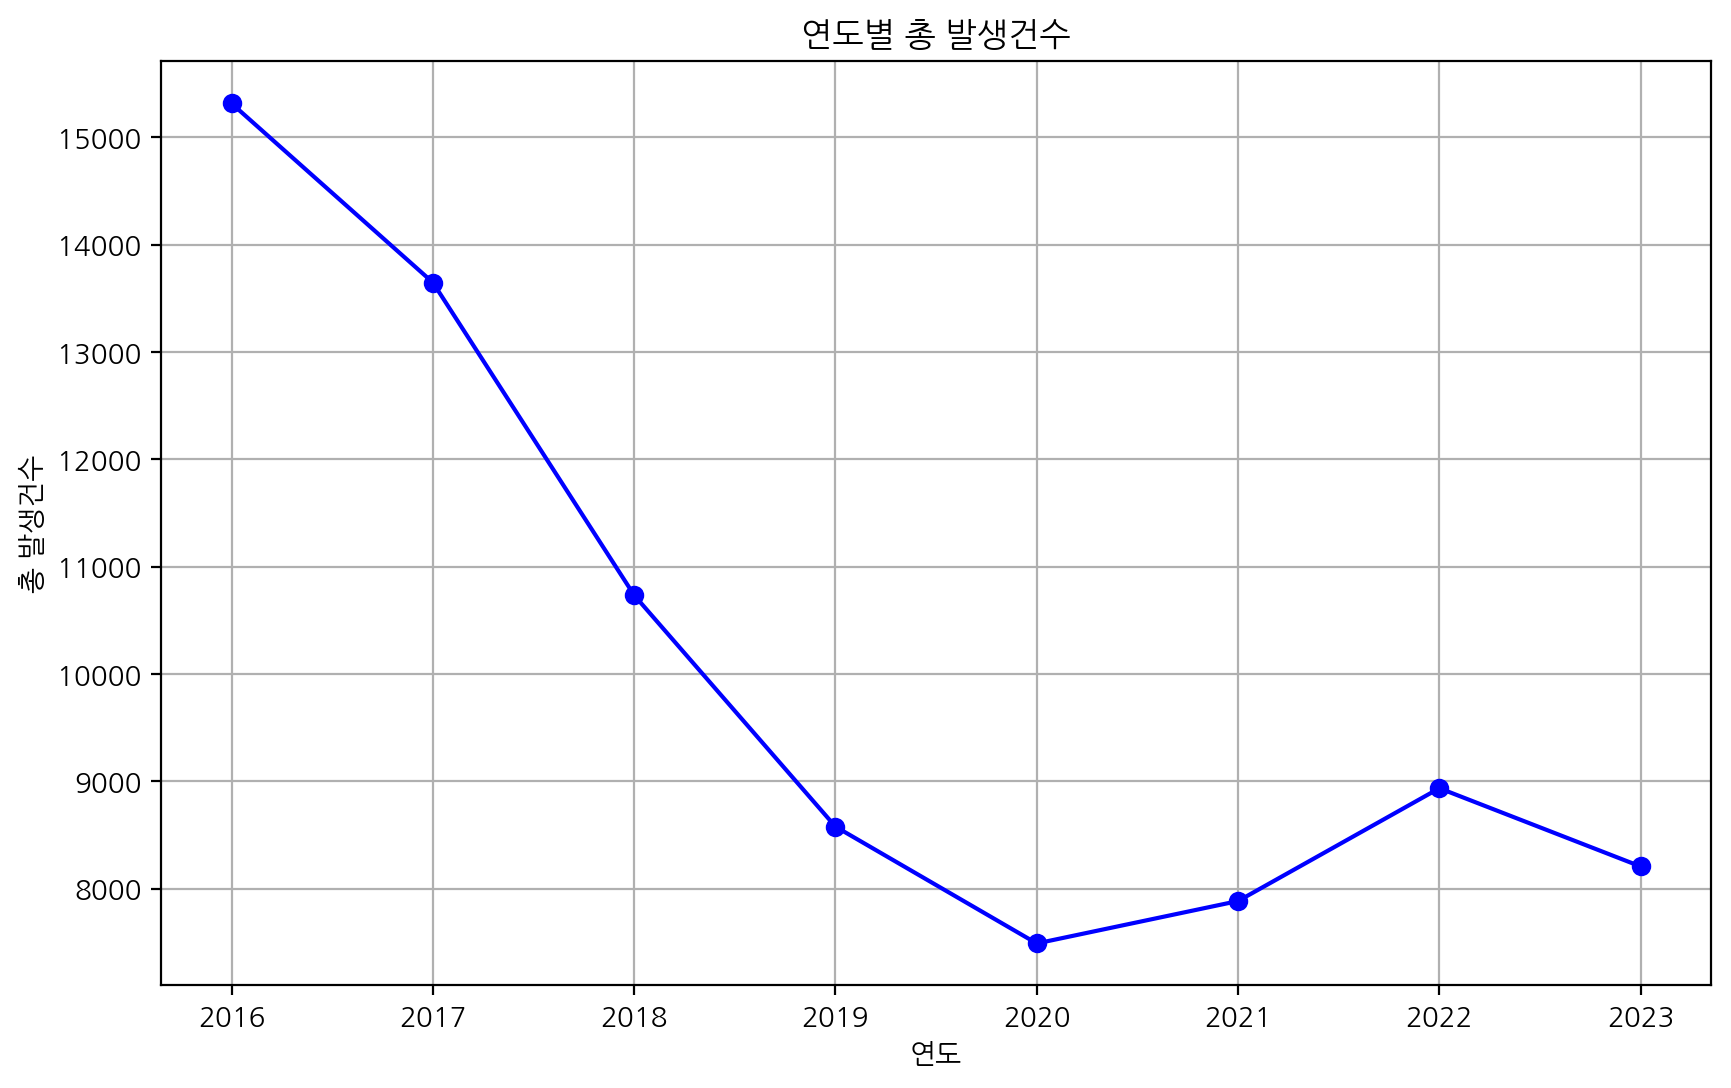

In [105]:
# 꺾은선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(total['구분'], total[0], marker='o', color='b')
plt.title('연도별 총 발생건수')
plt.xlabel('연도')
plt.ylabel('총 발생건수')
plt.xticks(total['구분'])  # x축 레이블을 구분으로 설정
plt.grid(True)
plt.show()
